uncomment de volgende lijn om streamlit te installeren

In [21]:
# pip install streamlit kaggle

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [23]:
import kaggle
import zipfile
import os

api = kaggle.api
datasets = api.datasets_list(search='Airplane Crashes and Fatalities')
ref = datasets[0]['ref']

kaggle.api.dataset_download_files(ref,path='data')

files = os.listdir("data")
for file in files:
    if ".zip" in file:
        with zipfile.ZipFile(f"data/{file}","r") as zip_ref:
            zip_ref.extractall("data")
            


In [24]:
acf_df = pd.read_csv("data/Airplane_Crashes_and_Fatalities_Since_1908.csv")
acf_df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [25]:


def extract_decade(date):
    return round(int(date.split('/')[2])/10)*10

hist_df = acf_df
hist_df['year'] = hist_df['Date'].apply(extract_decade)

pe.histogram(acf_df,x='year')

In [26]:
import json

acf_df.head()

words = {}

ignore_words = """
the
a
and
to
of
in
crashed
into
was
aircraft
plane
after
while
not
for 
off
en
on
at
by 
from
"""

for summary in acf_df['Summary'].dropna():
    try:
        sum_words = summary.split()
    
        for word in sum_words:
            word = word.lower()
            if word in ignore_words:
                continue
            if word in words:
                words[word] += 1
            else:
                words[word] = 0
    except:
        print(summary)

sorted_words = sorted(words,key=words.get,reverse=True)
sorted_counts = sorted(words.values(),reverse=True)



words = pd.DataFrame({'words':sorted_words,'counts':sorted_counts})
words.head(40)

,words,counts
0,pilot,935
1,flight,864
2,with,817
3,engine,784
4,during,782
5,failure,750
6,crew,693
7,approach,613
8,which,571
9,landing,567


In [27]:
acf_df = pd.read_csv("data/Airplane_Crashes_and_Fatalities_Since_1908.csv")
acf_df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


## Hoogste aantal doden per type en operator van de vliegtuigen

## Data Cleaning TYPE

In [28]:
type_fatalities = acf_df.groupby(acf_df['Type'])['Fatalities'].sum().reset_index()
print(type_fatalities)

                                       Type  Fatalities
0                              AAC-1 Toucan        23.0
1                                      AEGK         5.0
2                            AT L98 Carvair         4.0
3                                ATR 42-300         2.0
4                                ATR-42-300        46.0
...                                     ...         ...
2441                    de Havilland Dove 1        22.0
2442                  de Havilland Dragon 1         3.0
2443  de Havilland RU-6A Beaver /Bell UH-1H        18.0
2444     de havilland Canada Twin Otter 200        11.0
2445                      deHavilland DH-86         9.0

[2446 rows x 2 columns]


## Data verkenning TYPE + visualisatie

In [39]:
#Interactieve weergave van het type en fatalities
import plotly.express as px

fig = px.bar(type_fatalities.query('Fatalities > 1000'),
             y="Fatalities",
             x="Type",
             animation_frame="Type", animation_group="Type",
             color="Fatalities", 
             log_y=True,
             title="Type vliegtuig en Fatalities (Fatalities > 1000)", range_y=[1,10000], range_x=[-0.5,3.3])

fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()

Conclusie: We zien dus dat het type Douglas DC-3 de meeste doden had, in totaal waren dat 4793 personen. Als we kijken naar de top 4, met meeste fatalities boven 1000 personen, is er te zien dat alle vliegtuigen commerciele vliegtuigen zijn. Daarnaast is de Antonov AN-26 ook als militair toestel gebruikt. Wat opmerkt uit de visualisatie is dat er drie verschillende type vliegtuigen, met de meeste fatalities, van dezelfde vliegtuigbouwer zijn; Douglas. 

Dit zijn absolute waarden dus we hebben alleen naar fatalities gekeken en niet naar b.v. hoeveel vluchten de types hebben uitgevoerd.

## Data Cleaning OPERATOR

In [40]:
operator_fatalities = acf_df.groupby(acf_df['Operator'])['Fatalities'].sum().reset_index()
print(operator_fatalities)

                           Operator  Fatalities
0                 A B Aerotransport         3.0
1                  AB Aerotransport        58.0
2                     ACES Colombia        40.0
3                      ADC Airlines        97.0
4                     ADES Colombia        22.0
...                             ...         ...
2471           Zantop Air Transport        13.0
2472                 Zantop Airways         2.0
2473  Zantop International Airlines         4.0
2474                     Zen Nippon         2.0
2475          de Havilland Aircraft        11.0

[2476 rows x 2 columns]


## Data verkenning OPERATOR + visualisatie

In [46]:
# Nu kijken we naar de meeste doden per operator
# Top 7 operators met de meeste doden
import plotly.graph_objs as go

operator_data = operator_fatalities.query('Fatalities > 1000')

colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'gray', 'brown']

data = []
for i, operator in enumerate(operator_data['Operator'].unique()):
    operator_subset = operator_data[operator_data['Operator'] == operator]
    trace = go.Bar(
        x=operator_subset['Operator'], 
        y=operator_subset['Fatalities'], 
        name=operator, 
        visible=True,
        marker=dict(color=colors[i])
    )
    data.append(trace)

buttons = []
for operator in operator_data['Operator'].unique():
    button = dict(
        label=operator,
        method="update",
        args=[{"visible": [operator == trace.name for trace in data]}, {'title': operator}]
    )
    buttons.append(button)

updatemenus = list([
    dict(
        buttons=list(buttons),
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=1.2,
        xanchor="left",
        y=1.2,
        yanchor="top"
    ),
])

layout = go.Layout(
    title="Operator en Fatalities (Fatalities > 1000)",
    xaxis={'title': 'Operator'},
    yaxis={'title': 'Fatalities', 'range': [0, 10000]},
    updatemenus=updatemenus,
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)

fig.show()

Conclusie: Uit de data is te zien dat de operator Aeroflot de meeste doden heeft, in totaal zijn er 7156 personen gestorven. Wanneer we naar de gehele visualisatie kijken is er te zien dat er 5 commerciele operators zijn; Aeroflot, Air France, American Airlines, Pan American World Airways en United Air Lines. Daarnaast zijn er twee militairen operators met de meeste fatalities; U.S. Air Force en U.S. Army Air Forces.

## Regression model, nu en toekomst vanaf 2009

# Data cleaning REGRESSION 

In [43]:
date_fatalities = acf_df.groupby(acf_df['Date'])['Fatalities'].sum().reset_index()
date_fatalities['Date'] = pd.to_datetime(date_fatalities['Date'], unit='ns')
print(date_fatalities)

           Date  Fatalities
0    1966-01-01        34.0
1    1970-01-01         2.0
2    1974-01-01        38.0
3    1976-01-01        82.0
4    1978-01-01       213.0
...         ...         ...
4748 1972-12-31         5.0
4749 1976-12-31        19.0
4750 1981-12-31         4.0
4751 1985-12-31         7.0
4752 1997-12-31        10.0

[4753 rows x 2 columns]


## Data verkenning REGRESSION + visualisatie

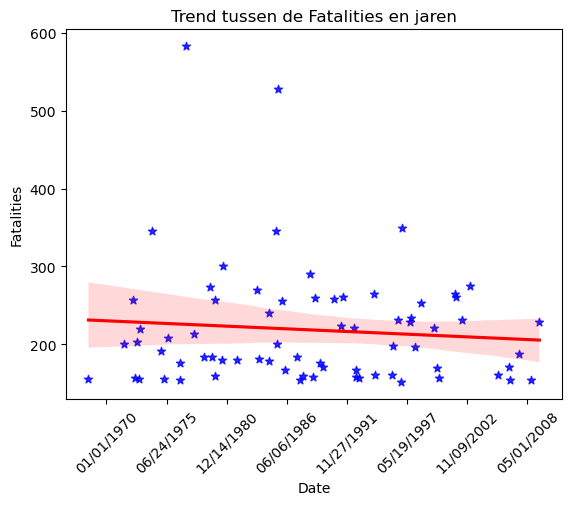

In [44]:
#Hier nog een checkbox toevoegen, zodat het de regressielijn weergeeft met een 'Ja' of 'Nee' 
import datetime
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

subset = date_fatalities[(date_fatalities['Date'] >= datetime.datetime(1950, 1, 1)) & (date_fatalities['Fatalities'] > 150)].copy()

subset.loc[:, 'Date'] = subset['Date'].apply(mdates.date2num)

ax = sb.regplot(data=subset, x='Date', y='Fatalities', fit_reg=True, dropna=True, marker='*', scatter_kws={"color": "blue"}, line_kws={"color": "red"})
date_format = mdates.DateFormatter('%m/%d/%Y')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_tick_params(rotation=45)

ax.set_title("Trend tussen de Fatalities en jaren")
plt.show()

Uit de visualisatie is er te zien dat er meerdere uitschieters zijn op verschillende jaren. Ook is er te zien dat er vanaf 1970-2008 er een afname is in fatalities. We wilde een voorspellend model maken, alleen dat zou niet betrouwbaar zijn, want de vliegtuigen in de dataset zullen verouderd zijn.

## Totaal aantal slachtoffers per jaar onderzoek m.b.v. bronnen

Bronnon: https://www.agcs.allianz.com/news-and-insights/expert-risk-articles/how-aviation-safety-has-improved.html

De hoge aantallen vliegtuigongelukken en sterfgevallen in 1970 werden veroorzaakt door meerdere factoren, waaronder toegenomen luchtverkeer, weersgerelateerde problemen, menselijke fouten, apparatuurstoringen en veiligheidskwesties zoals kapingen en pogingen tot kaping.

De afname van vliegtuigongelukken en sterfgevallen vanaf de jaren 2000 was te danken aan betere vliegtuigontwerpen, veiligheidstechnologieën, opleiding en certificeringsnormen voor piloten, luchtverkeersleidingssystemen, regelgeving en toezicht door luchtvaartautoriteiten, strengere veiligheidsprocedures van luchtvaartmaatschappijen (zoals onderhoudsinspecties, pre-flight checks en bemanningsbeheerpraktijken) en vooruitgang in weersvoorspellingen en communicatietechnologie.(How aviation safety has improved, z.d.)

In [45]:
!streamlit run case_2.py

^C
